# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [70]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [57]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [58]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

데이터 전처리 완료

In [60]:
from sklearn.linear_model import SGDClassifier

In [61]:
# 사이킷런 1.1.0 버전 이하일 경우 'log_loss'를 'log'로 바꾸어 주세요.
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # max_iter 반복횟수, log_loss 클래스마다 이진 분류 모델을 만듬
# 즉 도미는 양성 클래스로 두고 나머지를 모두 음성 클래스로 두는 방식 : OvR방식
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 낮는 점수 >> 지정횟수가 부족해 보임

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [62]:
sc.partial_fit(train_scaled, train_target) # 모델을 이어서 훈련할 때 사용하는 sc.partial_fit

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

In [63]:
import numpy as np

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = [] # 훈련세트 평가점수 적기 위한 빈 리스트 생성
test_score = [] # 테스트세트 

classes = np.unique(train_target) # 변수에 7개 생선의 목록 저장

In [64]:
for _ in range(0, 300): # 300번의 반복을 위해 특별한 변수 _ 사용
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

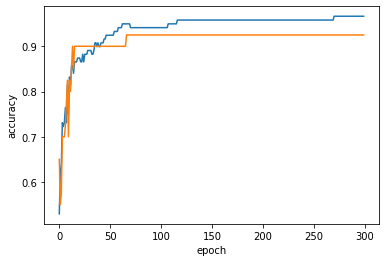

In [65]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [66]:
# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # 반복횟수 100 지정
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target)) # 10번 지정한것보다 높아짐
print(sc.score(test_scaled, test_target)) 

0.957983193277311
0.925


In [67]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # loss 매객변수 기본값 hinge
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


* 확률적 경사 하강법: 훈련 세트에서 샘플 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘
  - 미니배치 경사 하강법: 샘플을 여러개씩 사용
  - 배치경사 하강법: 한번에 전체 샘플을 사용

* 손실함수: 확률적 경사 하강법이 최적화할 대상
 - 이진 분류에는 로지스틱 회규 손실 함수 사용
 - 다중 분류에는 크로스엔트리포 손실 함수 사용
 - 회귀문제에는 평균 제곱 오차 손실 함수 사용

* 에포크: 확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한 번 반복

* scikit-learn
  - SGDClassifier는 확률적 경사 하강법을 사용한 분류 모델을 만듬
    * loss 매개변수로 손실함수 지정
    * penalty 매개변수에서 규제의 종류 지정
    * max_iter 매개변수는 에포크 횟수 지정
    * tol 매개변수는 반복을 멈출 조건

  - SGDRegressor는 확률적 경사 하강법을 사용한 회귀 모델을 만듬



